In [1]:
from tqdm import tqdm_notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import ujson as json
import os


IDs: MB 307; TK 337 \
https://docs.google.com/spreadsheets/d/15e1K0tg5ponA5R6YQkZfihrShTDLAKf5qeKaoVCiuhQ/edit#gid=0

In [30]:
#Team name, using IDs above: mlcourse_ai_fall2019_team_<id1>_…<id4> 

## Using json files for new features

In [12]:
#with open(os.path.join('/Users/m/Insight/MLcourse/Dota/', 'train_matches.jsonl')) as fin:
with open(os.path.join('/Users/m/Insight/MLcourse/Dota/train_matches.jsonl')) as fin:
    # read the 18-th line
    for i in range(18):
        line = fin.readline()
    
    # read JSON into a Python object 
    match = json.loads(line)



In [18]:
match.keys()

dict_keys(['game_time', 'match_id_hash', 'teamfights', 'objectives', 'chat', 'game_mode', 'lobby_type', 'players', 'targets'])

From https://www.kaggle.com/artgor/dota-eda-fe-and-models

In [19]:
def read_matches(matches_file):
    
    MATCHES_COUNT = {
        'test_matches.jsonl': 10000,
        'train_matches.jsonl': 39675,
    }
    _, filename = os.path.split(matches_file)
    total_matches = MATCHES_COUNT.get(filename)
    
    with open(matches_file) as fin:
        for line in tqdm_notebook(fin, total=total_matches):
            yield json.loads(line)

In [20]:
import collections

MATCH_FEATURES = [
    ('game_time', lambda m: m['game_time']),
    ('game_mode', lambda m: m['game_mode']),
    ('lobby_type', lambda m: m['lobby_type']),
    ('objectives_len', lambda m: len(m['objectives'])),
    ('chat_len', lambda m: len(m['chat'])),
]

PLAYER_FIELDS = [
    'hero_id',
    
    'kills',
    'deaths',
    'assists',
    'denies',
    
    'gold',
    'lh',
    'xp',
    'health',
    'max_health',
    'max_mana',
    'level',

    'x',
    'y',
    
    'stuns',
    'creeps_stacked',
    'camps_stacked',
    'rune_pickups',
    'firstblood_claimed',
    'teamfight_participation',
    'towers_killed',
    'roshans_killed',
    'obs_placed',
    'sen_placed',
]

def extract_features_csv(match):
    row = [
        ('match_id_hash', match['match_id_hash']),
    ]
    
    for field, f in MATCH_FEATURES:
        row.append((field, f(match)))
        
    for slot, player in enumerate(match['players']):
        if slot < 5:
            player_name = 'r%d' % (slot + 1)
        else:
            player_name = 'd%d' % (slot - 4)

        for field in PLAYER_FIELDS:
            column_name = '%s_%s' % (player_name, field)
            row.append((column_name, player[field]))
        row.append((f'{player_name}_ability_level', len(player['ability_upgrades'])))
        row.append((f'{player_name}_max_hero_hit', player['max_hero_hit']['value']))
        row.append((f'{player_name}_purchase_count', len(player['purchase_log'])))
        row.append((f'{player_name}_count_ability_use', sum(player['ability_uses'].values())))
        row.append((f'{player_name}_damage_dealt', sum(player['damage'].values())))
        row.append((f'{player_name}_damage_received', sum(player['damage_taken'].values())))
            
    return collections.OrderedDict(row)
    
def extract_targets_csv(match, targets):
    return collections.OrderedDict([('match_id_hash', match['match_id_hash'])] + [
        (field, targets[field])
        for field in ['game_time', 'radiant_win', 'duration', 'time_remaining', 'next_roshan_team']
    ])

In [22]:
%%time
#PATH_TO_DATA = '../input/'
df_new_features = []
df_new_targets = []

for match in read_matches(os.path.join('/Users/m/Insight/MLcourse/Dota/train_matches.jsonl')):
    match_id_hash = match['match_id_hash']
    features = extract_features_csv(match)
    targets = extract_targets_csv(match, match['targets'])
    
    df_new_features.append(features)
    df_new_targets.append(targets)


CPU times: user 1min 20s, sys: 7.39 s, total: 1min 27s
Wall time: 1min 47s


In [23]:
df_new_features = pd.DataFrame.from_records(df_new_features).set_index('match_id_hash')
df_new_targets = pd.DataFrame.from_records(df_new_targets).set_index('match_id_hash')

In [64]:
test_new_features = []
for match in read_matches(os.path.join('/Users/m/Insight/MLcourse/Dota/test_matches.jsonl')):
    match_id_hash = match['match_id_hash']
    features = extract_features_csv(match)
    
    test_new_features.append(features)
test_new_features = pd.DataFrame.from_records(test_new_features).set_index('match_id_hash')

In [65]:
#export_csv = test_new_features.to_csv(r'/Users/m/Insight/MLcourse/Dota/test_features_plus.csv', index = 'match_id_hash', header=True)

    Best heros?
    
    Lich
    Witch Doctor
    Lion
    Spirit Breaker
    Bounty Hunter
    Undying
    Bristleback
    Wraith King
    Abaddon

In [24]:
for match in read_matches(os.path.join('/Users/m/Insight/MLcourse/Dota/train_matches.jsonl')):
    match_id_hash = match['match_id_hash']
    game_time = match['game_time']
    
    # processing each game
    
    for player in match['players']:
        pass  # processing each player

In [292]:
#train_X = df_new_features
#test_X = test_new_features
#target = df_new_targets
#y = target['radiant_win']

In [4]:
train_X = pd.read_csv('/Users/m/Insight/MLcourse/Dota/train_features_plus.csv', index_col='match_id_hash')
test_X = pd.read_csv('/Users/m/Insight/MLcourse/Dota/test_features_plus.csv', index_col='match_id_hash')
target =  pd.read_csv('/Users/m/Insight/MLcourse/Dota/targets_plus.csv', index_col='match_id_hash')
y = target['radiant_win']

In [5]:
full_df = train_X.merge(y, how='outer', left_index=True, right_index=True)

In [6]:
full_df.isnull().sum().sum()

0

In [7]:
train_test_feat = pd.concat([train_X,test_X])
train_test_feat.head(2)

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed,d5_ability_level,d5_max_hero_hit,d5_purchase_count,d5_count_ability_use,d5_damage_dealt,d5_damage_received
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0,0,0,0,0,164,6,4,2332,681
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0,0,0,0,4,164,11,7,2308,2154


### Creating new features

In [8]:
def select_cols_n_distinct(data,min,max):
    '''select columns in data frame with number of 
    distinct values between min and max, inclusive'''
    cols = []
    for col in data.columns.values:
        unique_vals = data[col].value_counts().shape[0]
        if unique_vals >= min and unique_vals <= max:
            #cols.append((col,unique_vals))
            cols.append(col)
    return cols    

In [9]:
select_cols_n_distinct(train_X,2,2);

In [10]:
radiant_win_T = full_df[full_df['radiant_win'] == 1]['lobby_type']
radiant_win_F = full_df[full_df['radiant_win'] == 0]['lobby_type']
#sns.distplot(radiant_win_T, bins=100, label='R won')
#sns.distplot(radiant_win_F, bins=100, label='R lost')
#plt.xlim(1900, 2020)
#plt.legend()

In [11]:
#sns.countplot(x="lobby_type", hue="radiant_win", data=full_df);

In [12]:
new_features = pd.DataFrame(index=train_test_feat.index)

In [13]:
new_feats = [i.replace("1","")  for i in train_X.columns.values if (i.startswith('r1')==1 
                                                                    or i.startswith('d1')==1)]


Create a feature that is sum of r1 + ... + r5 for all r features, and same for all d features. Note that not all of these make sense, so some should be removed.

In [14]:
for feature in new_feats:
    feat_names = [(feature[0] + '{}_'.format(i) +feature[2:]) for i in range(1,6)]
    new_features[feature] = train_test_feat.loc[:,feat_names].sum(axis=1)
   # new_features[feature + '_mean'] = train_test_feat.loc[:,feat_names].mean(axis=1)
   #new_features[feature + '_std'] = train_test_feat.loc[:,feat_names].std(axis=1)
new_features.drop(['r_hero_id','d_hero_id'],inplace=True,axis=1)

In [15]:
len(new_features.columns)
#new_features.isnull().sum().sum()

58

### New features from TK

In [264]:
health = ['r{}_health'.format(x) for x in range(1,6)] +['d{}_health'.format(x) for x in range(1,6)]
max_health = ['r{}_health'.format(x) for x in range(1,6)] +['d{}_health'.format(x) for x in range(1,6)]
x = ['r{}_x'.format(x) for x in range(1,6)] +['d{}_x'.format(x) for x in range(1,6)]
y1 = ['r{}_y'.format(x) for x in range(1,6)] +['d{}_y'.format(x) for x in range(1,6)]
xp = ['r{}_xp'.format(x) for x in range(1,6)] +['d{}_xp'.format(x) for x in range(1,6)]

train_positions = train_X[health+max_health+x+y1+xp]
#train_positions.head(2)

In [265]:
X_train = train_positions

In [266]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(max_features = 'sqrt', max_depth = 8, n_estimators = 1000,
                             min_samples_leaf=3)
cls.fit(X_train,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [267]:
positions_full = full_df[health+max_health+x+y1+xp]
positions = cls.predict_proba(positions_full)[:,1]
new_features['positions'] = positions

ValueError: Length of values does not match length of index

In [16]:
def are_dead(x):
    ans = 0 
    for el in x:
        if el == 0:
            ans += 1
    return ans

In [17]:
d_health = ['d{}_health'.format(i) for i in range(1,6)]
new_features['d_dead'] = full_df[d_health].apply(are_dead, axis = 1)
r_health = ['r{}_health'.format(i) for i in range(1,6)]
new_features['r_dead'] = full_df[r_health].apply(are_dead, axis = 1)


In [18]:
percentage_health = 0
for j in range(5):
    max_health = '{}_max_health'.format(d_health[j].split('_')[0])
    health = 'd{}_health'.format(j+1)
    ph = full_df[health]/full_df[max_health]
    percentage_health += 1/5*ph

new_features['d_health_avg'] = percentage_health

percentage_health = 0
for j in range(5):
    max_health = '{}_max_health'.format(r_health[j].split('_')[0])
    health = 'r{}_health'.format(j+1)
    ph = full_df[health]/full_df[max_health]
    percentage_health += 1/5*ph

new_features['r_health_avg'] = percentage_health

In [308]:


def in_opponent_base(x,y,opponent = 'Radiant'):

    '''
returns indicator function of whether the player is in the base of the opponent
opponent = {'Radiant', 'Dire'} - opponent team
    
    '''
#     x = coordinates[0]
#     y = coordinates[1]
    radiant_base_x = 96
    radiant_base_y = 100

    dire_base_x = 156
    dire_base_y = 156

    if opponent == 'Radiant':
        if x <= radiant_base_x and y <= radiant_base_y:
            return 1
        else:
            return 0
    elif opponent == 'Dire':
        if x >= dire_base_x and y >= dire_base_y:
            return 1
        else:
            return 0
    else:
        return NaN



In [309]:


r_x = ['r{}_x'.format(j) for j in range(1,6)]
r_y = ['r{}_y'.format(j) for j in range(1,6)]
d_x = ['d{}_x'.format(j) for j in range(1,6)]
d_y = ['d{}_y'.format(j) for j in range(1,6)]

r_in_d_base = pd.Series(0,index = full_df.index)
d_in_r_base = pd.Series(0,index = full_df.index)

for j in range(5):
    rx = r_x[j]
    ry = r_y[j]
    dx = d_x[j]
    dy = d_y[j]
    r_in_d_base += full_df.loc[:,[rx,ry]].apply(lambda x: in_opponent_base(x = x[rx], y = x[ry], opponent = 'Radiant'), axis = 1)
    d_in_r_base += full_df.loc[:,[dx,dy]].apply(lambda x: in_opponent_base(x = x[dx], y = x[dy], opponent = 'Dire'), axis = 1)



In [310]:
new_features['r_in_d_base'] = r_in_d_base
new_features['d_in_r_base'] = d_in_r_base

In [19]:
d_levels = ['d{}_level'.format(j) for j in range(1,6)] 
d_avg_level = full_df.loc[:,d_levels].mean(axis = 1)
d_min_level = full_df.loc[:,d_levels].min(axis = 1)
d_max_level = full_df.loc[:,d_levels].max(axis = 1)
new_features['d_avg_level'] = d_avg_level
new_features['d_min_level'] = d_min_level
new_features['d_max_level'] = d_max_level


r_levels = ['r{}_level'.format(j) for j in range(1,6)] 
r_avg_level = full_df.loc[:,r_levels].mean(axis = 1)
r_min_level = full_df.loc[:,r_levels].min(axis = 1)
r_max_level = full_df.loc[:,r_levels].max(axis = 1)
new_features['r_avg_level'] = r_avg_level
new_features['r_min_level'] = r_min_level
new_features['r_max_level'] = r_max_level

In [20]:
r_teamfight = ['r{}_teamfight_participation'.format(j) for j in range(1,6)] 
for col in r_teamfight:
    full_df[full_df[col] >1][col] = 1

d_teamfight = ['d{}_teamfight_participation'.format(j) for j in range(1,6)] 
for col in d_teamfight:
    full_df[full_df[col] >1][col] = 1

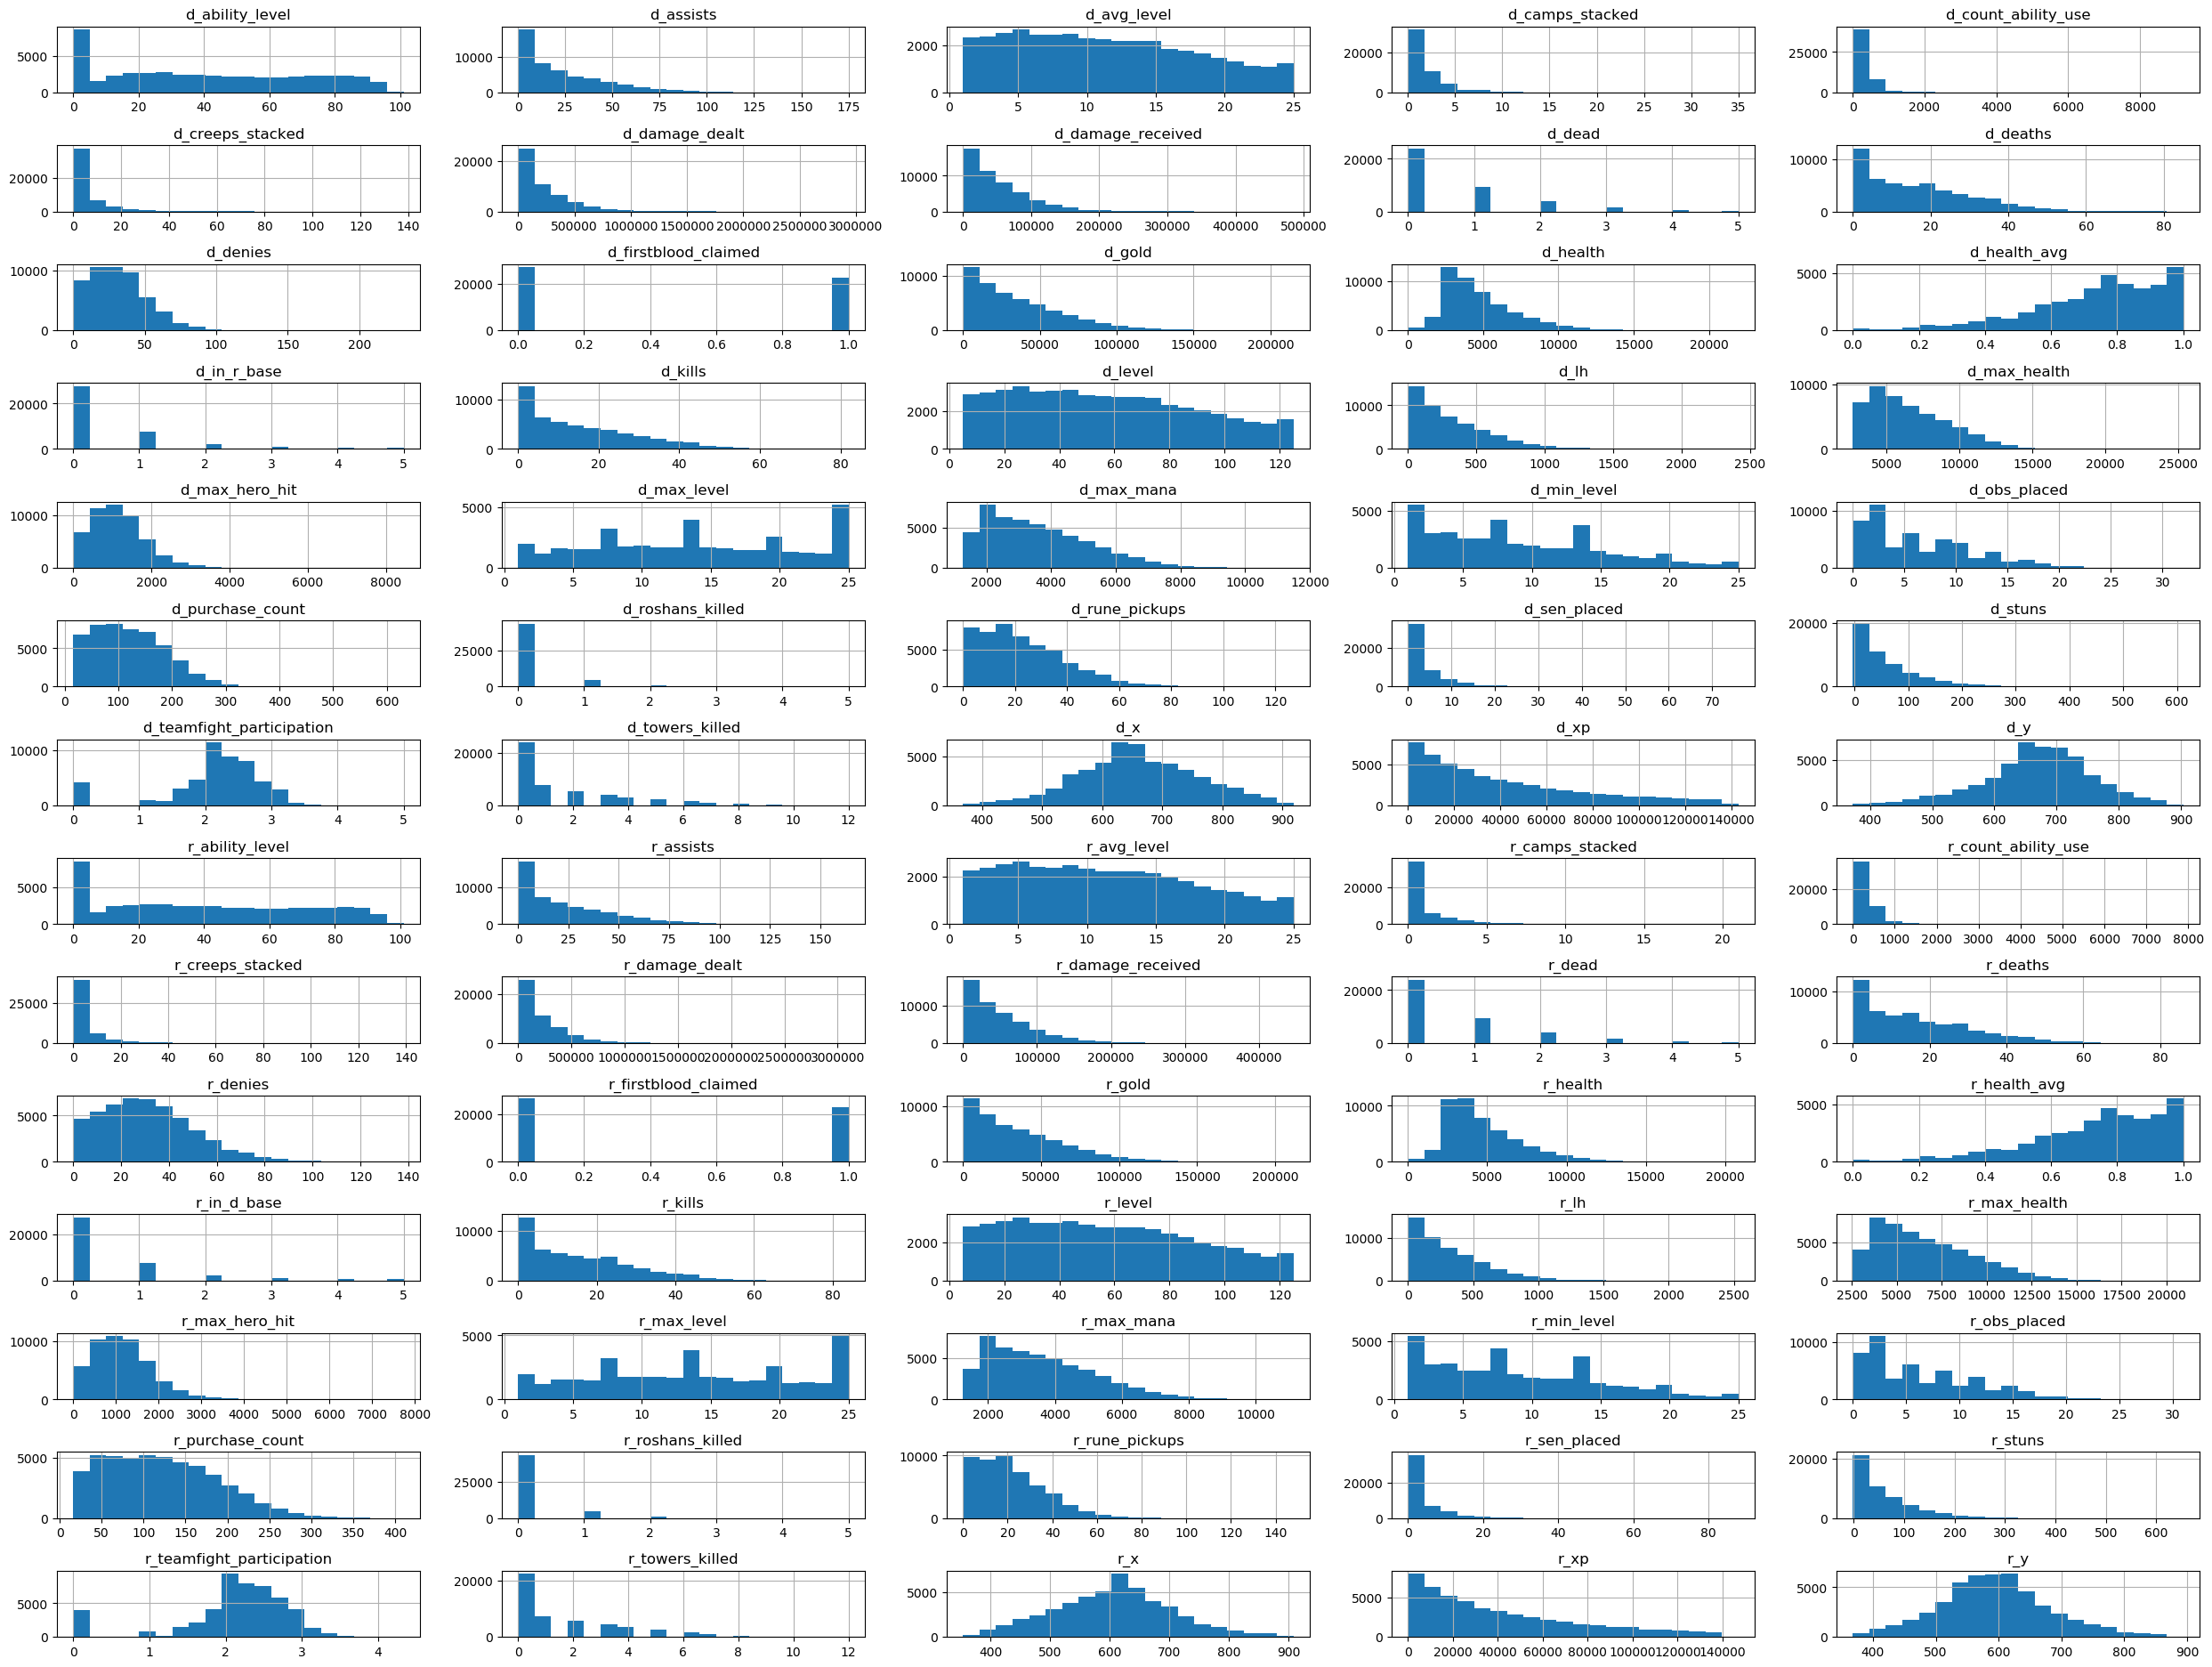

In [276]:
#new_features.drop('target',axis=1).hist(figsize = (25,80),layout = (50,5), bins=20)
new_features.hist(figsize = (25,80),layout = (60,5), bins=20)
plt.tight_layout()
plt.show()

### Create boolean features:

`*_ability_level`
`*_teamfight_participation`
`*_kills`
`*_assists`
`*_deaths`
`*_sen_placed`

In [21]:
test = pd.DataFrame()
def create_boolean_features(cols):
    for col in cols:
        new_features['boolean_' + col] = np.where(new_features[col]==0, 1, 0)

In [22]:
boolean_cols = ['r_ability_level','d_ability_level','r_teamfight_participation',
                'd_teamfight_participation','r_kills','d_kills',
                'r_assists','d_assists','r_deaths','d_deaths','r_sen_placed',
               'd_sen_placed']
create_boolean_features(boolean_cols)

### Take log of skewed features

In [23]:
import math
col_for_log =  ['r_count_ability_use','r_max_hero_hit',
                'r_damage_received','r_damage_dealt',
                'r_max_mana','r_max_health',
                'r_lh','r_health',
     'r_gold', 'r_xp', 'r_stuns',
    'd_count_ability_use', 'd_max_hero_hit',
                'd_max_mana','d_max_health',
                'd_damage_received','d_damage_dealt',
               'd_health', 'd_stuns',
     'd_gold', 'd_lh', 'd_xp']

for col in col_for_log:
    new_log_index = 'log_{}'.format(col)
#     print(new_features[col].min())
    new_features[col] = new_features[col].apply(lambda x: math.log(x+5))
    
train_test_feat['chat_len'] = train_test_feat['chat_len'].apply(lambda x: math.log(x+5))

Conclusions about categorical variables:
* firstblood_claimed : categorical, binary
* game_mode: categorical, non-ordinal --> needs to be converted to dummy variables
* lobby_type: categorical, binary (value 7 chould be changes with 1)
* hero_id: categorical, non-ordinal (too many levels)
* level: categorical, ordinal (25 levels)
* x,y are coordinates of players

## Combine old and new features

In [24]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [25]:
all_feats = train_test_feat.merge(new_features, how='outer', left_index=True, right_index = True)

In [41]:
all_feats.drop(all_feats.columns[all_feats.isnull().any()],inplace=True,axis=1)

In [42]:
all_feats.isnull().sum().sum()

0

In [319]:
all_feats.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,boolean_r_teamfight_participation,boolean_d_teamfight_participation,boolean_r_kills,boolean_d_kills,boolean_r_assists,boolean_d_assists,boolean_r_deaths,boolean_d_deaths,boolean_r_sen_placed,boolean_d_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,2.772589,11,0,0,0,0,...,1,0,1,0,1,0,0,1,1,1
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,2.708050,15,7,2,0,7,...,0,0,0,0,0,0,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,1.609438,101,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,2.197225,14,1,0,3,1,...,0,0,0,0,0,0,0,0,1,1
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,2.079442,42,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1


In [43]:
all_feats.shape

(49675, 375)

### Split `all_features` into train and test data

In [44]:
ind = train_X.shape[0]
all_feats_train = all_feats.iloc[:ind,]
all_feats_test = all_feats.iloc[ind:,:]
print(all_feats_train.shape)
print(all_feats_test.shape)

(39675, 375)
(10000, 375)


In [194]:
X_train, X_test, y_train, y_test = train_test_split(all_feats_train, y, test_size=.3, 
                                                    stratify=y)

In [195]:
X_train.shape

(27772, 387)

In [196]:
y_train.shape

(27772,)

In [197]:
pd.DataFrame(y_train).isnull().sum()

radiant_win    0
dtype: int64

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, LabelEncoder
from sklearn_pandas import DataFrameMapper

In [46]:
hero_ids = ['r{}_hero_id'.format(i) for i in range(1,6)] +['d{}_hero_id'.format(i) for i in range(1,6)]
cat_feats = select_cols_n_distinct(all_feats,2,3) + hero_ids
cat_feats.append('game_mode')

#cat_feats

In [47]:
#ord_feats = select_cols_n_distinct(all_feats,4,30)
#ord_feats.remove('game_mode')

In [48]:
num_feats = [feature for feature in all_feats.columns.values if feature not in cat_feats]
#num_feats = [feature for feature in all_feats.columns.values if feature not in ord_feats]

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
from lightgbm import LGBMClassifier
from sklearn.base import BaseEstimator

In [51]:
class ClassifierCustom(BaseEstimator):
    def __init__(self, C=1, n_estimators=200):
        self.n_estimators = n_estimators
        self.C = C
        
        self.models = []
        #self.boot = []
        #self.feat_ids_by_tree = []
    def fit(self, X, y):
            #log reg
            lr = LogisticRegression(C = self.C)
            self.models.append(lr.fit(X,y))
            
            #Adaboost
            ab = AdaBoostClassifier(n_estimators = 100, learning_rate = 1)
            self.models.append(ab.fit(X,y))
            
            #lgbm
            lgbm = LGBMClassifier(n_jobs=-1)
            self.models.append(lgbm.fit(X,y))
            return self
    
    def predict_proba(self, X):
        self.probs = []
        for i in range(len(self.models)):
            self.probs.append(self.models[i].predict_proba(X))
        self.probs = np.array(self.probs)
        self.averages = np.mean(self.probs, axis = 0)
        return self.averages
    
    def predict(self,X):
        self.predictions =  self.predict_proba(X) >=0.5 
        return self.predictions


In [72]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier

class Columns(BaseEstimator, TransformerMixin):
    def __init__(self, names=None):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]
    
    

pipe = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(Columns(names=num_feats),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=cat_feats),OneHotEncoder(sparse=False)))
    ])),
  #  ('PCA',PCA(n_components = 300,whiten=True)),
    ('logreg', LogisticRegression(C=1))])
    #('custom', ClassifierCustom(C = 0.95, n_estimators = 150))])
    #('adaboost', AdaBoostClassifier(n_estimators = 150))])
    #('lgbm', LGBMClassifier(n_jobs=-1))])

In [73]:
pipe.fit(all_feats_train,y)

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric', Pipeline(memory=None,
     steps=[('columns', Columns(names=['game_time', 'objectives_len', 'chat_len', 'r1_kills', 'r1_deaths', 'r1_assists', 'r1_denies', 'r1_gold', 'r1_lh', 'r1_xp', 'r1_health', 'r1_max_health', 'r1_m...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [182]:
predicted = pipe.predict(X_test)

In [188]:
print(accuracy_score(y_test, predicted[:,1]))

0.726623540283962


In [190]:
print(roc_auc_score(y_test,predicted[:,1]))

0.7245922727102911


Note: So far, logreg with C = 0.95 does the best. The Custom ensemble is also close. PCA decreases both metrics and position on leaderboard; RF also decreased leaderboard position, over logreg (best so far).\
`cross_val_predict` gives ROC AUC 0.8132 for logistic regression. ROC AUC 0.8049 for lightGBM (untuned)

### Custom classifier: logreg, Adaboost, lgbm

## Grid Search

In [54]:
from sklearn.model_selection import GridSearchCV

In [80]:
param_grid_lgbm = {
    'lgbm__max_depth': [18],
    'lgbm__learning_rate': [.01],
    'lgbm__num_leaves': [4,8,16], #large will increase accuracy but may overfit
    'lgbm__learning_rate': [0.005],
    'lgbm__n_estimators': [40],
    'lgbm__num_leaves': [6,8,12,16],
    'lgbm__boosting_type' : ['gbdt'],
    'lgbm__objective' : ['binary'],
    'lgbm__random_state' : [501], # Updated from 'seed'
    'lgbm__colsample_bytree' : [0.65, 0.66],
    'lgbm__subsample' : [0.7,0.75],
    'lgbm__reg_alpha' : [1,1.2],
    'lgbm__reg_lambda' : [1,1.2,1.4],
    }

In [55]:
param_grid_logreg = {
    'logreg__C': [.9,0.95,1],
    'PCA__n_components': [300]
}

In [56]:
param_grid_ab = {
    'adaboost__n_estimators': [75,100,125],
}

In [62]:
grid_clf = GridSearchCV(pipe, param_grid_logreg, cv=5, iid=False)
grid_clf.fit(X_train, y_train);

In [63]:
grid_clf.best_params_

{'PCA__n_components': 300, 'logreg__C': 1}

In [66]:
print("grid search best: %f" % grid_clf.best_estimator_.score(X_test, y_test))


NameError: name 'y_test' is not defined

Logistic regression is doing better than other models. In grid search with best C = 0.9.

PCA best around 300 (+-15).

AdaBoost is doing more poorly; best `n_estimators` is 150 among `[50,100,150]`

### Preparing submission

In [74]:
#X_test_vals = all_feats_test.values
y_test_pred = pipe.predict_proba(all_feats_test)[:, 1]

df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred}, 
                                 index=all_feats_test.index)


In [75]:
df_submission.head(2)

,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.153295
70e5ba30f367cea48793b9003fab9d38,0.983220


In [76]:
import datetime
submission_filename = 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)
print('Submission saved to {}'.format(submission_filename))

Submission saved to submission_2019-11-11_21-44-50.csv


Not using this:

In [86]:
from sklearn.model_selection import cross_val_predict

In [60]:
cv_pred = cross_val_predict(pipe, 
                             X_train, 
                             y_train, 
                             cv=5,
                             method="predict_proba")

In [61]:
print("Cross validation AUC {:.4f}".format(roc_auc_score(y_train, cv_pred[:,1])))

Cross validation AUC 0.8049


In [56]:
from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (num_feats, StandardScaler()),
    (cat_feats, OneHotEncoder()))



/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


In [58]:
pipe2 = make_pipeline(
    preprocess,
   # StandardScaler(),
    LGBMClassifier(n_jobs=-1)
)